In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Iris.csv")
df.drop('Id',inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
#Independent feature
x=df.iloc[:,:-1]
# Dependent feature
y=df['Species']

In [5]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
Data=pd.DataFrame(scaling.fit_transform(x))
Data.columns=[x for x in x.columns]
Data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
#Spliting Data
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Data,y,test_size=0.2,random_state=0)

In [7]:
#Model
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
pred=model.predict(x_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
error_rate = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model1= KNeighborsClassifier(n_neighbors=i)
    model1.fit(x_train, y_train)
    pred1 = model1.predict(x_test)
    error_rate.append(np.mean(pred1 != y_test))

Text(0, 0.5, 'Mean Error')

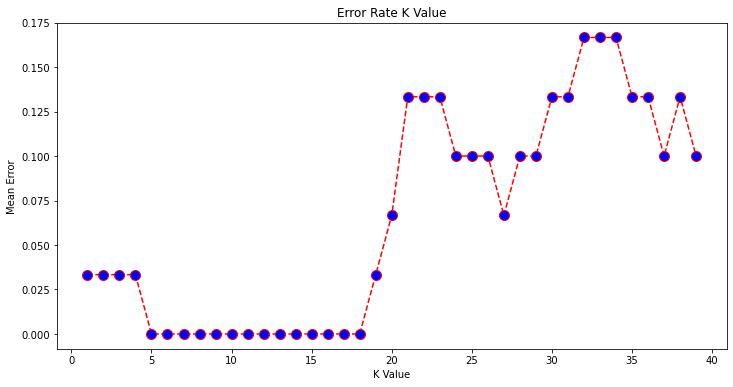

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [12]:
#### Choosing a best K value
from sklearn.model_selection import cross_val_score
accuracy=[]
for i in range(1,34):
    model2=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(model2,x,y,cv=10)
    accuracy.append(score.mean())

In [13]:
df=pd.DataFrame(accuracy)

df.columns=["Accuracy"]
df.head()

,Accuracy
0,0.960000
1,0.953333
2,0.966667
3,0.966667
4,0.966667


In [14]:
max(df['Accuracy'])

0.9800000000000001

In [22]:
df['Accuracy'][15]

0.9733333333333334

In [16]:
df['Accuracy']

0     0.960000
1     0.953333
2     0.966667
3     0.966667
4     0.966667
5     0.966667
6     0.966667
7     0.966667
8     0.973333
9     0.966667
10    0.966667
11    0.973333
12    0.980000
13    0.973333
14    0.973333
15    0.973333
16    0.973333
17    0.980000
18    0.973333
19    0.980000
20    0.966667
21    0.966667
22    0.973333
23    0.960000
24    0.966667
25    0.960000
26    0.966667
27    0.953333
28    0.953333
29    0.953333
30    0.946667
31    0.946667
32    0.946667
Name: Accuracy, dtype: float64